In [121]:
from multiprocessing import Pool
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [163]:
def open_data(path):
    df1 = open(os.path.join(path), "r")  
    _list = df1.readlines()
    data = []
    for i in range(len(_list)):
        data.append(_list[i].split('\t'))
    df = pd.DataFrame(data)
    df.columns = df.iloc[0]
    df = df[1:]
    
    #remove rows without a gender
    df['gender'].replace('', np.nan, inplace=True)
    df['age'].replace('None', np.nan, inplace=True)
    df.dropna(subset=['gender'], inplace=True)
    df.dropna(subset=['age'], inplace=True)
    return df

In [164]:
def categorizing(df):
    categories = ['Toddler', 'Young_Child', 'Child', 'Teenager', 'Adolescent', 'Young_Adult', 'Adult', 'Abraham', 'Elderly']
    df['age'].replace(['(0, 2)', '2', '3'], categories[0], inplace = True)
    df['age'].replace(['(4, 6)'], categories[1], inplace = True)
    df['age'].replace(['(8, 12)', '13'], categories[2], inplace = True)
    df['age'].replace(['(15, 20)'], categories[3], inplace = True)
    df['age'].replace(['23', '22'], categories[4], inplace = True)
    df['age'].replace(['(27, 32)', '(25, 32)', '29'], categories[5], inplace = True)
    df['age'].replace(['35','34', '(38, 43)', '42', '46', '(38, 48)', '(38, 42)','45', '36'], categories[6], inplace = True)
    df['age'].replace(['(48, 53)','55', '58','57'], categories[7], inplace = True)
    df['age'].replace(['(60, 100)'], categories[8], inplace = True)
    df['age'].replace(['(8, 23)'], np.nan, inplace = True)
    df.dropna(subset=['age'], inplace=True)
    return df

In [165]:
df = open_data('C:/Users/Arno/Desktop/Facial/MasterText_fold_data.txt.txt')

In [166]:
df = categorizing(df)

In [167]:
# Check data
count = df.groupby('age').nunique()
count

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
age,,,,,,,,,,,,
Abraham,78,787,228,1,2,680,582,321,342,31,7,154
Adolescent,13,222,25,1,2,224,201,169,170,24,7,117
Adult,114,2352,462,1,2,1333,1040,608,646,38,7,187
Child,66,1673,196,1,3,1167,998,506,507,37,7,178
Elderly,65,728,185,1,3,618,528,297,312,36,7,150
Teenager,62,1069,316,1,3,1023,794,485,480,30,7,164
Toddler,43,2499,55,1,3,1081,950,884,893,48,7,167
Young_Adult,123,3812,623,1,3,1681,1236,792,876,38,7,190
Young_Child,55,1962,130,1,3,1145,991,587,622,43,7,181


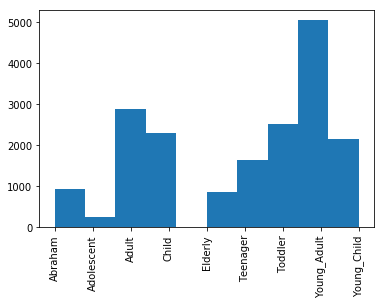

In [168]:
# Plot age distribution
plt.hist(df['age'])
plt.xticks(rotation=90)
plt.show()

In [178]:
def find_files(folder_path):
    directory = []
    for file in os.listdir(folder_path):
        if file.endswith(".jpg"):
            directory.append(os.path.join(file))
    return directory

In [185]:
def get_ids(directory):
    ids = []
    for i in range(len(directory)):
        splits = directory[i].split('.')
        ids.append(splits[2]+'.jpg')
    return ids

In [258]:
def useful_df(df, ids):
    useful = np.zeros((len(ids),3), dtype = str)
    for i in range(len(ids)):
        change = df.loc[df['original_image'] == ids['original_image'][i]].as_matrix()
        useful[i][0] = ids['original_image'][i]
        useful[i][1] = change[3] #Age
        useful[i][2] = change[4] #Gender
        
    return useful    

In [186]:
files = find_files('C:/Users/Arno/Desktop/Facial/DataBase')

In [222]:
ids = get_ids(files)
df_ids = pd.DataFrame(ids)
df_ids.rename(columns = {0: "original_image"}, inplace=True)

In [259]:
df_useful = useful_df(df,df_ids)

IndexError: index 3 is out of bounds for axis 0 with size 2

In [253]:
len(df_ids)

6714

TypeError: merge() got an unexpected keyword argument 'validation'

AttributeError: 'DataFrame' object has no attribute 'validate'

In [250]:
df_ids

,original_image
0,8194283079_fe7c8c9b2f_o.jpg
1,8314899476_8c1ac2e4bb_o.jpg
2,8884658111_c692813a62_o.jpg
3,10009166853_a6b50b4117_o.jpg
4,8195375498_06c6fc5627_o.jpg
5,8215787552_3198c25285_o.jpg
6,8586120507_6c519d5923_o.jpg
7,8314893776_8ddb4d4549_o.jpg
8,8194283079_fe7c8c9b2f_o.jpg
9,8469357784_ac74572242_o.jpg


0